# 3.2.1 Adam Optimizer

The Adam (Adaptive Moment Estimation) optimizer is an advanced optimization algorithm that combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like AdaGrad, Adam also keeps an exponentially decaying average of past gradients, similar to momentum.

### Benefits of Adam
- **Computational Efficiency**: Adam is computationally efficient and has low memory requirements.
- **Invariant to Diagonal Rescaling**: The algorithm is invariant to diagonal rescaling of the gradients.
- **Suitable for Non-Stationary Problems**: Adam is well-suited for problems with large data sets and high-dimensional parameter spaces.
- **Hyperparameter Sensitivity**: Adam requires little tuning and works well with default hyperpar gradients.


## Readings:

- [Gradient Descent and Adam Optimization](https://towardsdatascience.com/understanding-gradient-descent-and-adam-optimization-472ae8a78c10)
- [Complete Guide to Adam Optimization](https://medium.com/@LayanSA/complete-guide-to-adam-optimization-1e5f29532c3d) 
- [ADAM optimization in machine learning](https://medium.com/@francescofranco_39234/adam-optimization-in-machine-learning-cfeb10a27a86)
- [Adam Optimization Algorithm](https://readmedium.com/en/https:/medium.com/towards-data-science/adam-optimization-algorithm-1cdc9b12724a)

### Adam Algorithm Steps

1. **Initialization**: Initialize the parameters, first moment estimate (`m`), second moment estimate (`v`), and time step (`t`).

2. **Gradient Calculation**: Compute the gradient of the objective function with respect to the parameters.

3. **First Moment Estimate**: Update the biased first moment estimate:
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   $$

4. **Second Moment Estimate**: Update the biased second raw moment estimate:
   $$
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   $$

5. **Bias Correction**: Compute bias-corrected first moment estimate:
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
   $$
   Compute bias-corrected second raw moment estimate:
   $$
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$

6. **Parameter Update**: Update the parameters using the following rule:
   $$
   \theta_t = \theta_{t-1} - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
   $$

### Implementation

We will implement the Adam optimizer to minimize a simple quadratic function \( f(x) = (x - 3)^2 \). This function has a global minimum at \( x = 3 \), making it a straightforward test case for the optimization algorithm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Quadratic function
def f(x):
    return (x - 3)**2

# Gradient of the quadratic function
def grad_f(x):
    return 2 * (x - 3)

In [3]:
# Adam Optimizer parameters
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
n_iterations = 100
x_init = 0.0

In [4]:
# Initialize parameters
x_adam = x_init
m = 0
v = 0
t = 0
adam_history = [x_adam]
costs = [f(x_adam)]

In [5]:
# Adam Optimization loop
for _ in range(n_iterations):
    t += 1
    g = grad_f(x_adam)
    
    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * g
    
    # Update biased second raw moment estimate
    v = beta2 * v + (1 - beta2) * g**2
    
    # Compute bias-corrected first moment estimate
    m_hat = m / (1 - beta1**t)
    
    # Compute bias-corrected second raw moment estimate
    v_hat = v / (1 - beta2**t)
    
    # Update parameters
    x_adam = x_adam - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
    adam_history.append(x_adam)
    costs.append(f(x_adam))

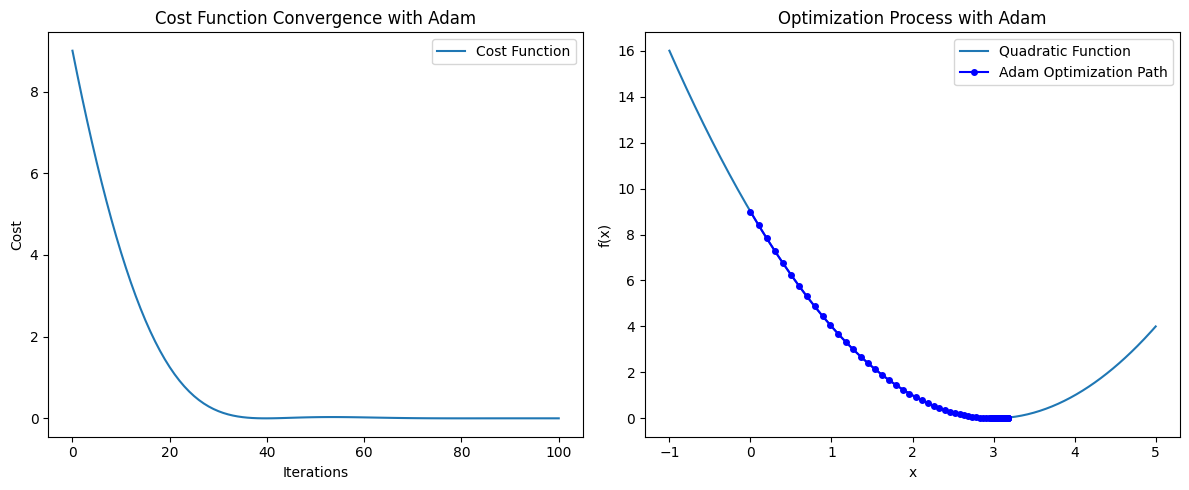

In [6]:
# Plotting the cost function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence with Adam')
plt.legend()

# Visualization of the optimization process
plt.subplot(1, 2, 2)
x_vals = np.linspace(-1, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='Quadratic Function')
adam_history = np.array(adam_history)
plt.plot(adam_history, f(adam_history), 'bo-', label='Adam Optimization Path', markersize=4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization Process with Adam')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Output the final parameter
print(f"Parameters after {n_iterations} iterations: {x_adam}")

Parameters after 100 iterations: 2.9806554375278123


## Conclusion

The Adam optimizer, with its adaptive learning rates and momentum, is a powerful optimization algorithm that can efficiently handle large data sets and high-dimensional parameter spaces. By maintaining a history of gradients, Adam adjusts the learning rates for each parameter, ensuring stable convergence even in noisy or sparse gradient scenarios. The implementation demonstrated how Adam can effectively minimize a simple quadratic function, highlighting its practical utility in optimization problems. This approach is widely used in training deep learning models due to its robustness and efficiency.
